# **Aula 09 - Redes Neurais: MultiLayer Perceptron (MLP)**
Sílvia Moraes
---
Neste exemplo usamos o **dataset da planta velha**, disponível em https://archive.ics.uci.edu/dataset/53/velha


In [1]:
#importando os pacotes usados
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

Fazendo a carga do dataset e gerando os conjuntos X (atributos de entrada) e Y (tipo de planta velha).

In [2]:
#Exemplo com a planta velha
velha = pd.read_csv("amostras_r.csv",sep=';')
print(velha.shape)
X = velha.iloc[:, [0, 1, 2, 3,4,5,6,7,8]].values
y = velha.iloc[:, [9]].values


(750, 10)


Printando os dados de entrada e os rótulos de cada coluna.

In [3]:
print("DADOS DE ENTRADA")
print(velha.columns[0],velha.columns[1], velha.columns[2], velha.columns[3],velha.columns[4],velha.columns[5],velha.columns[6],velha.columns[7],velha.columns[8])
print(X)

DADOS DE ENTRADA
pos1 pos2 pos3 pos4 pos5 pos6 pos7 pos8 pos9
[[-1  1 -1 ...  0  1 -1]
 [-1  1  1 ...  0  1 -1]
 [-1  1  0 ... -1  1  1]
 ...
 [ 1 -1  1 ...  0  0  1]
 [-1  1 -1 ...  0  0  0]
 [ 0  1 -1 ...  0 -1  0]]


In [4]:
print("DADOS DE SAÍDA")
print("Classe do jogo da velha")
print(y)

DADOS DE SAÍDA
Classe do jogo da velha
[['Fim_de_jogo']
 ['Fim_de_jogo']
 ['Fim_de_jogo']
 ['Possibilidade_de_fim_de_jogo']
 ['Fim_de_jogo']
 ['Em_jogo']
 ['Em_jogo']
 ['Fim_de_jogo']
 ['Em_jogo']
 ['Em_jogo']
 ['Fim_de_jogo']
 ['Fim_de_jogo']
 ['Possibilidade_de_fim_de_jogo']
 ['Fim_de_jogo']
 ['Possibilidade_de_fim_de_jogo']
 ['Possibilidade_de_fim_de_jogo']
 ['Possibilidade_de_fim_de_jogo']
 ['Em_jogo']
 ['Possibilidade_de_fim_de_jogo']
 ['Fim_de_jogo']
 ['Fim_de_jogo']
 ['Em_jogo']
 ['Fim_de_jogo']
 ['Fim_de_jogo']
 ['Em_jogo']
 ['Fim_de_jogo']
 ['Em_jogo']
 ['Possibilidade_de_fim_de_jogo']
 ['Fim_de_jogo']
 ['Possibilidade_de_fim_de_jogo']
 ['Fim_de_jogo']
 ['Fim_de_jogo']
 ['Fim_de_jogo']
 ['Em_jogo']
 ['Possibilidade_de_fim_de_jogo']
 ['Em_jogo']
 ['Em_jogo']
 ['Em_jogo']
 ['Em_jogo']
 ['Fim_de_jogo']
 ['Em_jogo']
 ['Possibilidade_de_fim_de_jogo']
 ['Possibilidade_de_fim_de_jogo']
 ['Em_jogo']
 ['Em_jogo']
 ['Fim_de_jogo']
 ['Possibilidade_de_fim_de_jogo']
 ['Em_jogo']
 ['Possib

Divisão dos conjuntos de treino e teste usando o método train_test_split. O conjunto de treino ficou com 80% dos dados e o restante, 20%, ficou para o conjunto de teste.

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9, stratify=y, random_state=42)
print(X_test.shape)

(75, 9)


In [6]:
X_tr, X_v, y_tr, y_v = train_test_split(X_train, y_train, test_size=0.1, stratify=y_train, random_state=42)
print(X_v.shape)



(68, 9)


In [7]:
print("----------Conjunto de Treino-----------")
for i in range(0,len(X_tr)):
  print(i,"-", X_tr[i],"-",y_tr[i])

----------Conjunto de Treino-----------
0 - [-1  1 -1  1  1 -1  1 -1  1] - ['Fim_de_jogo']
1 - [-1  1 -1  0  0  1 -1  1  0] - ['Possibilidade_de_fim_de_jogo']
2 - [ 1 -1  1 -1  1  1 -1  0  0] - ['Em_jogo']
3 - [-1  1 -1  1  1 -1  0  0  1] - ['Em_jogo']
4 - [-1  1 -1  0  1  0  0  0  0] - ['Possibilidade_de_fim_de_jogo']
5 - [-1  1  1  1  1 -1  1 -1 -1] - ['Fim_de_jogo']
6 - [ 1 -1  1  0  0  0  0 -1  0] - ['Em_jogo']
7 - [ 0  1 -1  1  1  1 -1  0 -1] - ['Fim_de_jogo']
8 - [-1  1 -1  0  0  1 -1  0  1] - ['Em_jogo']
9 - [-1  1  1  1 -1  1 -1  0 -1] - ['Fim_de_jogo']
10 - [ 0  1 -1  0  1 -1  0 -1  1] - ['Possibilidade_de_fim_de_jogo']
11 - [-1  1  1  0 -1  1  0  0 -1] - ['Fim_de_jogo']
12 - [ 1 -1  1 -1  0  0  0 -1  1] - ['Possibilidade_de_fim_de_jogo']
13 - [-1  1 -1  1  0  0  1  0  0] - ['Em_jogo']
14 - [ 1 -1  1  1  0 -1  0  0  0] - ['Em_jogo']
15 - [ 1 -1  1 -1  0  1 -1  0  0] - ['Possibilidade_de_fim_de_jogo']
16 - [ 0  1 -1  0  1 -1  1  0 -1] - ['Fim_de_jogo']
17 - [ 1 -1  1 -1  1 -1  

In [8]:
print("\n----------Conjunto de Validacao-----------")
for i in range(0,len(X_v)):
  print(i,"-",X_v[i],"-",y_v[i])


----------Conjunto de Validacao-----------
0 - [-1  1 -1 -1  1  1  1 -1  1] - ['Fim_de_jogo']
1 - [ 1 -1  1  0 -1 -1  0  0  1] - ['Em_jogo']
2 - [ 0  1 -1  1 -1 -1  1  0  1] - ['Em_jogo']
3 - [ 0  1 -1  0  1  0  0  0 -1] - ['Possibilidade_de_fim_de_jogo']
4 - [-1  1  1  1 -1  1  0 -1 -1] - ['Fim_de_jogo']
5 - [ 1 -1  1  0  0 -1  1  0  0] - ['Em_jogo']
6 - [ 1 -1  1  1 -1 -1  0  1 -1] - ['Possibilidade_de_fim_de_jogo']
7 - [ 0  1 -1  1 -1  1  1  0 -1] - ['Possibilidade_de_fim_de_jogo']
8 - [ 1 -1  1  0  0 -1 -1  1  1] - ['Em_jogo']
9 - [-1  1 -1  1  1 -1  0 -1  1] - ['Possibilidade_de_fim_de_jogo']
10 - [ 1 -1  0  0  0  0  0  0  0] - ['Em_jogo']
11 - [-1  1  1 -1 -1  1  0  0  1] - ['Fim_de_jogo']
12 - [ 0  1 -1  1  0 -1  1 -1  1] - ['Em_jogo']
13 - [-1  1 -1  1  0  0  1  1 -1] - ['Possibilidade_de_fim_de_jogo']
14 - [ 0  1 -1 -1  1 -1  0  1  1] - ['Fim_de_jogo']
15 - [ 0  1 -1  1  0 -1  1 -1  0] - ['Possibilidade_de_fim_de_jogo']
16 - [ 0  1  1 -1 -1 -1  0  0  1] - ['Fim_de_jogo']
17 -

In [9]:
print("\n----------Conjunto de Teste-----------")
for i in range(0,len(X_test)):
  print(i,"-",X_test[i],"-",y_test[i])


----------Conjunto de Teste-----------
0 - [ 0  1  1  0  1 -1  1 -1 -1] - ['Fim_de_jogo']
1 - [-1  1 -1  1  0  1 -1  0  0] - ['Possibilidade_de_fim_de_jogo']
2 - [ 1 -1  1  0  0  0  1  0 -1] - ['Em_jogo']
3 - [ 0  1 -1 -1  1  1 -1  1  0] - ['Fim_de_jogo']
4 - [-1  1 -1 -1  1  1  1  0  0] - ['Em_jogo']
5 - [-1  1 -1  1  0 -1  1  1  0] - ['Possibilidade_de_fim_de_jogo']
6 - [ 1 -1 -1  1 -1  1 -1  1  0] - ['Fim_de_jogo']
7 - [ 1 -1  1  0  0  0  0  0 -1] - ['Em_jogo']
8 - [ 0  1 -1  1 -1 -1  1 -1  1] - ['Possibilidade_de_fim_de_jogo']
9 - [-1  1 -1  1 -1  0  1 -1  1] - ['Possibilidade_de_fim_de_jogo']
10 - [ 1 -1  1  1 -1 -1  0  1  0] - ['Em_jogo']
11 - [ 0  1 -1  1  1 -1 -1  0  0] - ['Possibilidade_de_fim_de_jogo']
12 - [ 1 -1  1 -1  1  1 -1  1 -1] - ['Fim_de_jogo']
13 - [-1  1  0 -1 -1  1 -1  1  1] - ['Fim_de_jogo']
14 - [ 1 -1  1  0  1  1 -1  0 -1] - ['Possibilidade_de_fim_de_jogo']
15 - [ 1 -1  1  0  0 -1  0  0  1] - ['Em_jogo']
16 - [ 1 -1  1  0  0  1 -1 -1  1] - ['Fim_de_jogo']
17 -

Gerando o classificador com a seguinte configuração:

*   algoritmo: adam
*   40 neurônios na camada oculta, portanto a topologia resultante foi 4 x 40 x 3
*   taxa de aprendizagem inicial de 0.1
*   constante de momentum de 0.5

Função de perda geralmente inferior a 0.05.




In [10]:
clf = MLPClassifier(solver='adam', hidden_layer_sizes=(50,), learning_rate_init=0.1, momentum=0.5, verbose=True)
clf.fit(X_tr, y_tr.ravel())

Iteration 1, loss = 1.12149813
Iteration 2, loss = 0.98507222
Iteration 3, loss = 0.95767341
Iteration 4, loss = 0.82894107
Iteration 5, loss = 0.81118125
Iteration 6, loss = 0.76919451
Iteration 7, loss = 0.72609381
Iteration 8, loss = 0.75278816
Iteration 9, loss = 0.69064448
Iteration 10, loss = 0.67967701
Iteration 11, loss = 0.73057519
Iteration 12, loss = 0.75698137
Iteration 13, loss = 0.72091004
Iteration 14, loss = 0.76302852
Iteration 15, loss = 0.73079273
Iteration 16, loss = 0.66574342
Iteration 17, loss = 0.69205220
Iteration 18, loss = 0.82363911
Iteration 19, loss = 0.71380361
Iteration 20, loss = 0.83484539
Iteration 21, loss = 0.69246299
Iteration 22, loss = 0.76149837
Iteration 23, loss = 0.89615619
Iteration 24, loss = 0.84012892
Iteration 25, loss = 0.75941922
Iteration 26, loss = 0.66126440
Iteration 27, loss = 0.65717431
Iteration 28, loss = 0.65870468
Iteration 29, loss = 0.64016470
Iteration 30, loss = 0.60920976
Iteration 31, loss = 0.62283304
Iteration 32, los

,hidden_layer_sizes,"(50,)"
,activation,'relu'
,solver,'adam'
,alpha,0.0001
,batch_size,'auto'
,learning_rate,'constant'
,learning_rate_init,0.1
,power_t,0.5
,max_iter,200
,shuffle,True
,random_state,None


VALIDACAO CRUZADA

In [11]:
param_grid = {
        'hidden_layer_sizes': [(10,),(20,),(50,)],
        'activation': ['tanh', 'relu'],
        'solver': ['sgd', 'adam'],
        'alpha': [0.0001, 0.001],
        'learning_rate_init': [0.01,0.1],
        'momentum':[0.5,0.9]
    }

grid = GridSearchCV(
    MLPClassifier(max_iter=10000),
    param_grid,
    n_jobs=-1,
    cv=10,         # 10-fold cross-validation
    scoring='accuracy'
)
grid.fit(X_tr, y_tr.ravel())
print("Melhores parametros:", grid.best_params_)
print("Acurácia média de validação:", grid.best_score_)

Melhores parametros: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (50,), 'learning_rate_init': 0.1, 'momentum': 0.5, 'solver': 'sgd'}
Acurácia média de validação: 0.8302732240437158


VALIDACAO EXPLICITA (10%)

In [17]:
clf = MLPClassifier(hidden_layer_sizes=(40,), activation='relu', solver='sgd', max_iter=300, learning_rate_init=0.1)
clf.fit(X_test, y_test.ravel())

y_val_pred = clf.predict(X_v)
print("Acurácia na validação:", accuracy_score(y_v, y_val_pred))

Acurácia na validação: 0.6323529411764706


Executando a predição para as entradas (X) do conjunto de teste.

In [25]:
clf = MLPClassifier(hidden_layer_sizes=(50,), activation='relu', solver='sgd', max_iter=1000, learning_rate_init=0.1)
clf.fit(X_tr, y_tr.ravel())
y_predicao = clf.predict(X_test)

Exibindo os resultados por meio da matriz de confusão. É pela matriz de confusão de conseguimos verificar os erros e acertos dos classificadores.
Os acertos estão sempre na diagonal principal.

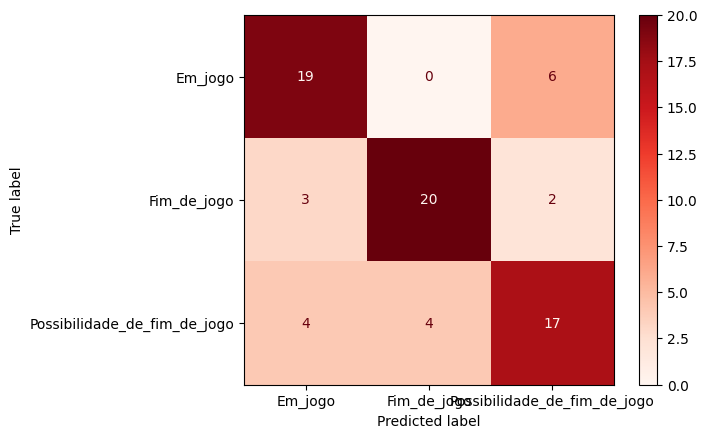

In [26]:
nomes_classes = velha.iloc[:, [9]].values
classes_unicas = np.unique(nomes_classes)
#print(classes_unicas)

cm = confusion_matrix(y_test, y_predicao)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes_unicas)
disp.plot(cmap='Reds')

No trecho abaixo, mostramos a forma de cálculo da acurácia. E também executamos o método accuracy_score que igualmente calcula a acurácia. Executando ainda o método classification_report que calcula as métricas conhecidas precision, recall e f-measure.

In [15]:
acerto = 0
for i in range(0, len(y_predicao)):
  if y_predicao[i]==y_test[i]: acerto = acerto + 1

print("Acuracia: ", acerto/len(y_predicao))
print(accuracy_score(y_test, y_predicao))
print(classification_report(y_test, y_predicao))

Acuracia:  0.7466666666666667
0.7466666666666667
                              precision    recall  f1-score   support

                     Em_jogo       0.73      0.76      0.75        25
                 Fim_de_jogo       0.87      0.80      0.83        25
Possibilidade_de_fim_de_jogo       0.65      0.68      0.67        25

                    accuracy                           0.75        75
                   macro avg       0.75      0.75      0.75        75
                weighted avg       0.75      0.75      0.75        75



Abaixo, exibimos as classes e os pesos (modelo) encontrado no treinamento.

In [16]:
print("Classes: ", clf.classes_ )
print("Melhor loss: ", clf.best_loss_)
print(clf.coefs_)
print(clf.intercepts_)
print(clf.get_params)

Classes:  ['Em_jogo' 'Fim_de_jogo' 'Possibilidade_de_fim_de_jogo']
Melhor loss:  0.3172085374734084
[array([[ 5.70536501e-01,  3.81512149e-01, -1.77798552e-01,
        -7.24029751e-01, -4.10008650e-01, -3.00581126e-01,
        -8.04246638e-02, -2.65281924e-01,  1.17053888e-01,
        -1.41920014e-01, -9.85995637e-01,  1.10479218e-01,
         5.18715950e-01,  1.61200408e-01, -9.81244274e-01,
         2.13235661e-01, -3.28100795e-01,  4.97802987e-01,
         1.76308614e-01, -3.03451548e-01, -3.55205946e-01,
         1.82839009e-01,  2.85849397e-01,  7.00859399e-01,
        -5.36349558e-01,  3.83426955e-01,  1.28802862e-01,
         3.20874710e-01, -2.48265650e-01, -7.06521861e-01,
        -5.89873652e-01, -4.64454429e-01, -1.51347683e-01,
        -1.82000951e-02, -1.14064674e-01,  1.50487238e-01,
        -9.83025249e-01, -1.58557603e-01,  5.34340442e-01,
         6.97166621e-01, -2.24112123e-01,  2.03801867e-01,
         2.90527575e-02, -1.86484629e-01,  2.33241305e-01,
        -1.936